# CETO Spring 2022 
[Competition website](https://sites.google.com/view/tolymp/ceto/ceto-4)

Computer Experiment Team Olympiad is a team competition organised by students from Taras Shevchenko National University of Kyiv. The competition is organised for students of 9th-11th grade, but I decided to try to solve myself one of the tasks. I have already participated previously in this olympiad as the school student and worked on the similar problem from CETO 2019 Autumn that later inspired me for my research with which I have reached National level of Junior Academy of Sciences of Ukraine.

By doing this small research I want to practise my math skills as well as practise with Jupyter notebooks.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
print("Hello World")

Hello World


# Зламаний коник

Колега доктора Бiодольского, професор Комашевський, дослiджує родину незвичайних коникiв (усi коники з цiєї родини мають однаковi бiологофiзичнi характеристики). Вiн випускає їх у вiдкрите поле та спостерiгає за їх стрибками. Довжина кожного стрибку складає 30 см. Пiсля кожного стрибку з ймовiрнiстю 𝑝 = 0,2 коник пiдвертає ногу. Якщо коник пiдвертає ногу, то йому необхiдно 𝑡 = 0,5 хвилини на вiдпочинок, пiсля чого вiн знову може продовжити стрибати (якщо коник ногу не пiдвертає, то вiдпочинок не потрiбен). Знайдiть середню швидкiсть 𝑣 коника з такої родини. Для цього виконайте наступнi завдання:
    
1. Вважаючи що час стрибка коника 1 с (i надалi вважайте час стрибку 1 с, якщо це не уточнюється), знайдiть середню швидкiсть для 𝑁 = 500, 1000, 1500, . . . стрибкiв (чим бiльше експериментiв, тим краще), побудуйте графiк залежностi 𝑣(𝑁 );

2. Знайдiть залежнiсть середньої швидкостi 𝑣 вiд ймовiрностi 𝑝 пiдвертання ноги;

3. Нехай коник зламався i почав стрибати з ймовiрнiстю 𝑝𝑠 = 0,3 на вiдстань 15 см i з ймовiрнiстю  ̄𝑝𝑠 = 1 − 0,3 = 0,7 на вiдстань 30 см. За умови що вiн пiсля кожного стрибка з ймовiрнiстю 𝑝 = 0,2 пiдвертає ногу, знайдiть середню швидкiсть коника;

4. Нехай коник зовсiм з’їхав з глузду i стрибаючи на вiдстань 15 см, вiн почав пiдвертати ногу з ймовiрнiстю 0,2, а стрибаючи на вiдстань 30 см — з ймовiрнiстю 0,3. Враховуючи що ймовiрнiсть стрибка на 15 см 𝑝𝑠 = 0,3, а на вiдстань 30 см:  ̄𝑝𝑠 = 1 − 0,3 = 0,7, знайдiть середню швидкiсть коника;

5. (extra) Нехай час стрибка коника рiвний 𝑇 , причому 𝑇 < 1с. Розв’яжiть пункт 1 за рiзних значень параметра 𝑇 , зокрема дослiдiть як поводиться середня швидкiсть при 𝑇 → 0.

## Constants

In [34]:
p = 0.2 #probability of breaking the leg
jump_length = 30 * 10**-2 #jump length
t = 0,5 * 60 #timeput after leg was broken
actions = ["j", "b"] #j - jump made, b - leg broken
probabilities = [1 - p, p]

## Task 1
> Вважаючи що час стрибка коника 1 с (i надалi вважайте час стрибку 1 с, якщо це не уточнюється), знайдiть середню швидкiсть для 𝑁 = 500, 1000, 1500, . . . стрибкiв (чим бiльше експериментiв, тим краще), побудуйте графiк залежностi 𝑣(𝑁 );

In [35]:
#Average velocity fot 500, 1000 and 1500 jumps
def time_needed_for_fixed_number_of_jumps(number_of_jumps):
    result = 0
    jumps_made = 0
    while jumps_made < number_of_jumps:
        outcome = np.random.choice(actions, size = 1, p = probabilities)
        if outcome == "b":
            result += 30
        elif outcome == "j":
            jumps_made += 1
            result += 1
    return result

In [57]:
#Average spped for 500 jumps
average_time_500_jumps = np.mean(time_needed_for_fixed_number_of_jumps(500))
average_speed_500 = jump_length * 500 / average_time_500_jumps
print("Average speed when doing 500 jumps: ", average_speed_500)

#Average spped for 1000 jumps
average_time_1000_jumps = np.mean(time_needed_for_fixed_number_of_jumps(1000))
average_speed_1000 = jump_length * 1000 / average_time_1000_jumps
print("Average speed when doing 1000 jumps: ", average_speed_1000)

#Average spped for 1500 jumps
average_time_1500_jumps = np.mean(time_needed_for_fixed_number_of_jumps(1500))
average_speed_1500 = jump_length * 1500 / average_time_1500_jumps
print("Average speed when doing 1500 jumps: ", average_speed_1500)

#Average spped for 15000 jumps
average_time_15000_jumps = np.mean(time_needed_for_fixed_number_of_jumps(15000))
average_speed_15000 = jump_length * 15000 / average_time_15000_jumps
print("Average speed when doing 15000 jumps: ", average_speed_15000)

Average speed when doing 500 jumps:  0.030737704918032786
Average speed when doing 1000 jumps:  0.0356718192627824
Average speed when doing 1500 jumps:  0.033112582781456956
Average speed when doing 15000 jumps:  0.035629453681710214


In [63]:
data = []

for number_of_jumps in range(500, 5000, 500):
    average_speed = np.mean([number_of_jumps * jump_length / 
                             time_needed_for_fixed_number_of_jumps(number_of_jumps) 
                             for number_of_experiments in range(100)])
    data.append(average_speed)


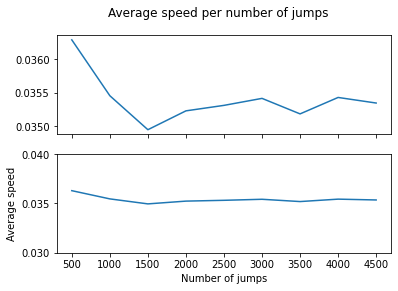

In [100]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Average speed per number of jumps")
plt.xticks(range(len(data)), range(500, 5000, 500))
plt.ylabel("Average speed")
plt.xlabel("Number of jumps")
plt.ylim(0, 0.1)
ax1.plot(data)

plt.xticks(range(len(data)), range(500, 5000, 500))
plt.ylabel("Average speed")
plt.xlabel("Number of jumps")
plt.ylim(0.03, 0.04)
ax2.plot(data)